In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('emotion_data_prep.tsv',delimiter = '\t',quoting = 3)

In [ ]:
# Define the mapping of mood labels
label_map = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Love', 4: 'Anger'}


In [ ]:
# Preprocess the data
X = data['Review']
y = data['Mood']

# Convert any non-string values to strings
X = X.astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X_pad.shape[1]))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(len(label_map), activation='softmax'))

In [ ]:
# Compile the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Epoch 1/3
1551/1551 [==============================] - 155s 96ms/step - loss: 0.9882 - accuracy: 0.6015 - val_loss: 0.8911 - val_accuracy: 0.6422
Epoch 2/3
1551/1551 [==============================] - 140s 90ms/step - loss: 0.7433 - accuracy: 0.7107 - val_loss: 0.9255 - val_accuracy: 0.6335
Epoch 3/3
1551/1551 [==============================] - 145s 94ms/step - loss: 0.5833 - accuracy: 0.7771 - val_loss: 1.0325 - val_accuracy: 0.6185


In [ ]:
# Evaluate the LSTM model
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {lstm_test_accuracy}')

388/388 [==============================] - 6s 14ms/step - loss: 1.0325 - accuracy: 0.6185
LSTM Test Accuracy: 0.6184793710708618


In [ ]:
# Generate predictions for the LSTM model
lstm_y_pred_prob = lstm_model.predict(X_test)
lstm_y_pred = np.argmax(lstm_y_pred_prob, axis=1)


388/388 [==============================] - 9s 22ms/step


In [ ]:
# Create a confusion matrix for the LSTM model
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)


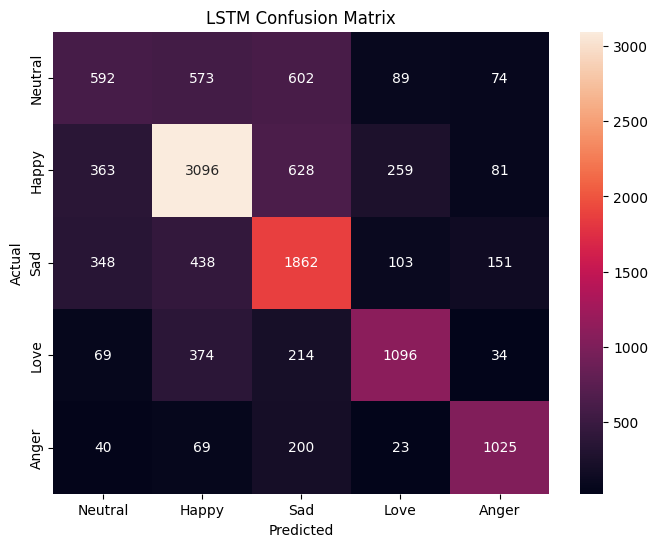

In [ ]:
# Plot the confusion matrix for the LSTM model
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()

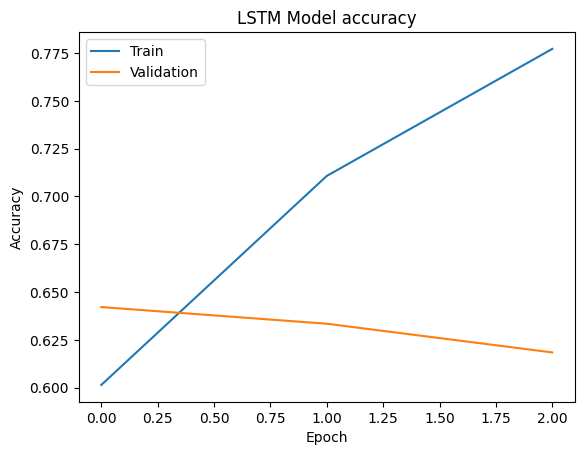

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

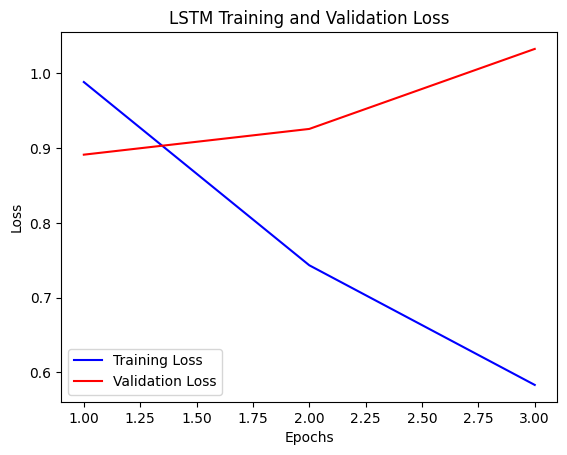

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the training and validation loss from the history object
train_loss = lstm_history.history['loss']
val_loss = lstm_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import GRU

# Build the GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X_pad.shape[1]))
gru_model.add(GRU(128))
gru_model.add(Dense(len(label_map), activation='softmax'))

In [ ]:
# Compile the GRU model
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Epoch 1/3
1551/1551 [==============================] - 133s 83ms/step - loss: 0.9804 - accuracy: 0.6040 - val_loss: 0.8938 - val_accuracy: 0.6431
Epoch 2/3
1551/1551 [==============================] - 131s 84ms/step - loss: 0.7391 - accuracy: 0.7115 - val_loss: 0.9246 - val_accuracy: 0.6352
Epoch 3/3
1551/1551 [==============================] - 122s 79ms/step - loss: 0.5617 - accuracy: 0.7889 - val_loss: 1.0388 - val_accuracy: 0.6200


In [ ]:
# Evaluate the GRU model
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {gru_test_accuracy}')

388/388 [==============================] - 9s 24ms/step - loss: 1.0388 - accuracy: 0.6200
GRU Test Accuracy: 0.6200112700462341


In [ ]:
# Generate predictions for the GRU model
gru_y_pred_prob = gru_model.predict(X_test)
gru_y_pred = np.argmax(gru_y_pred_prob, axis=1)


388/388 [==============================] - 4s 9ms/step


In [ ]:
# Create a confusion matrix for the GRU model
gru_conf_matrix = confusion_matrix(y_test, gru_y_pred)

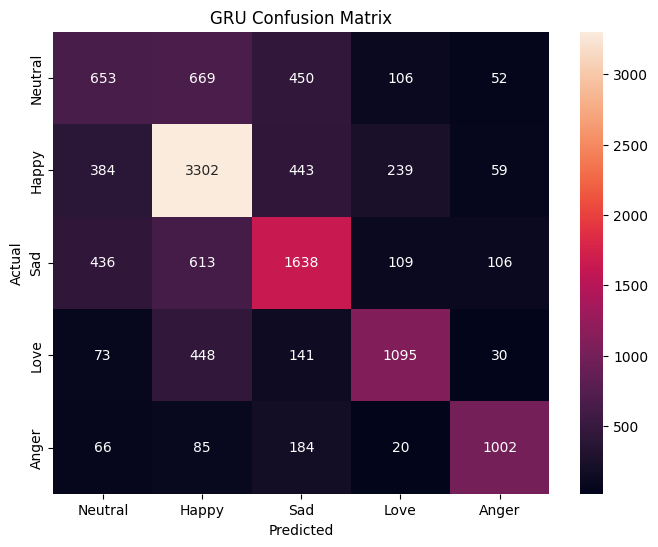

In [ ]:
# Plot the confusion matrix for the GRU model
plt.figure(figsize=(8, 6))
sns.heatmap(gru_conf_matrix, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GRU Confusion Matrix')
plt.show()

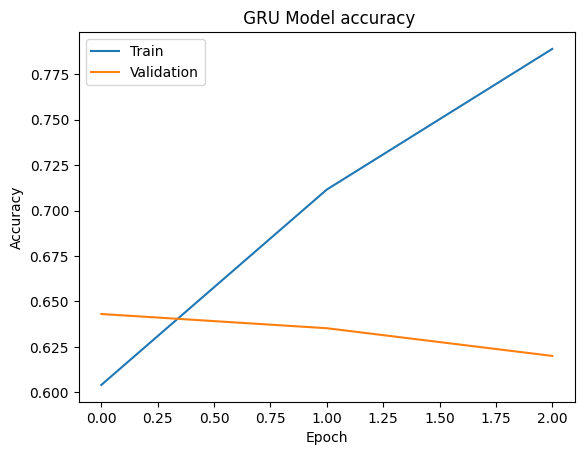

In [ ]:
# Plot training & validation accuracy values
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title(' GRU Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

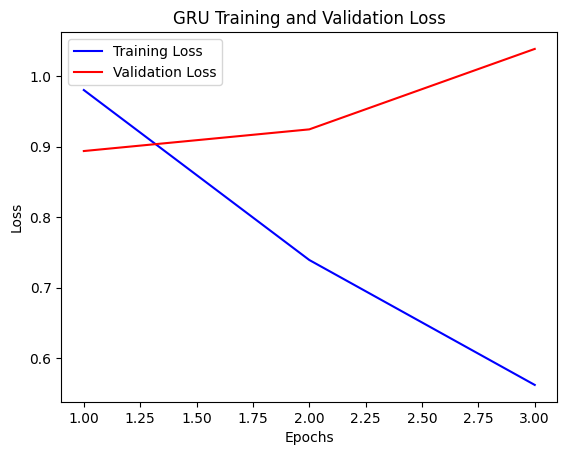

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the training and validation loss from the history object
train_loss = gru_history.history['loss']
val_loss = gru_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('GRU Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import Bidirectional, LSTM

# Build the BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X_pad.shape[1]))
bilstm_model.add(Bidirectional(LSTM(128)))
bilstm_model.add(Dense(len(label_map), activation='softmax'))

In [ ]:
# Compile the BiLSTM model
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the BiLSTM model
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Epoch 1/3
1551/1551 [==============================] - 216s 134ms/step - loss: 0.9855 - accuracy: 0.5973 - val_loss: 0.8912 - val_accuracy: 0.6439
Epoch 2/3
1551/1551 [==============================] - 198s 128ms/step - loss: 0.7479 - accuracy: 0.7088 - val_loss: 0.9401 - val_accuracy: 0.6273
Epoch 3/3
1551/1551 [==============================] - 198s 128ms/step - loss: 0.5897 - accuracy: 0.7743 - val_loss: 1.0249 - val_accuracy: 0.6187


In [ ]:
# Evaluate the BiLSTM model
bilstm_test_loss, bilstm_test_accuracy = bilstm_model.evaluate(X_test, y_test)
print(f'BiLSTM Test Accuracy: {bilstm_test_accuracy}')


388/388 [==============================] - 11s 27ms/step - loss: 1.0249 - accuracy: 0.6187
BiLSTM Test Accuracy: 0.6187213063240051


In [ ]:
# Generate predictions for the BiLSTM model
bilstm_y_pred_prob = bilstm_model.predict(X_test)
bilstm_y_pred = np.argmax(bilstm_y_pred_prob, axis=1)

388/388 [==============================] - 15s 33ms/step


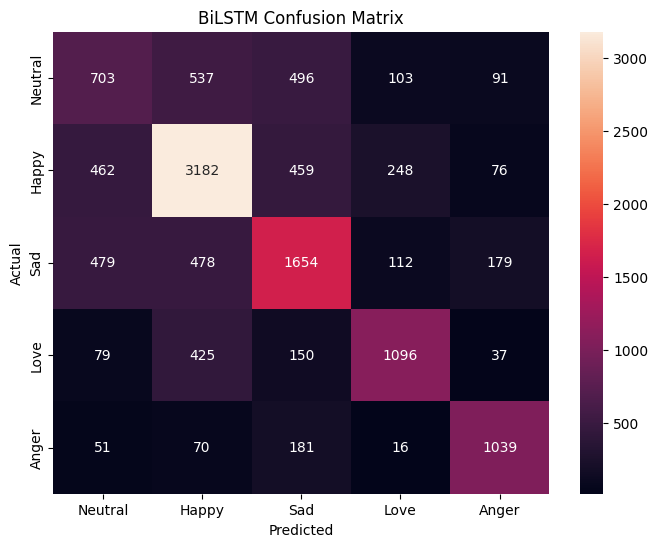

In [ ]:
# Create a confusion matrix for the BiLSTM model
bilstm_conf_matrix = confusion_matrix(y_test, bilstm_y_pred)

# Plot the confusion matrix for the BiLSTM model
plt.figure(figsize=(8, 6))
sns.heatmap(bilstm_conf_matrix, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BiLSTM Confusion Matrix')
plt.show()

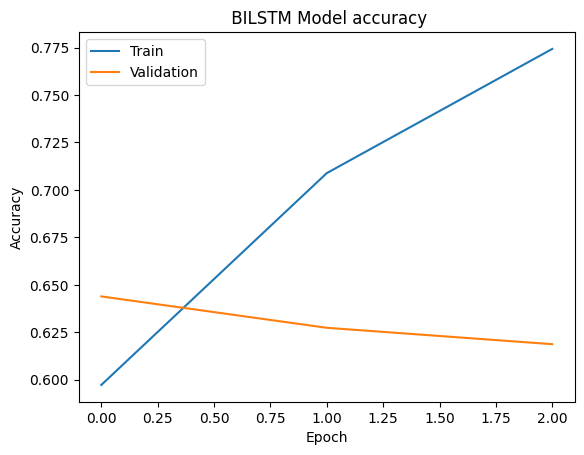

In [ ]:
# Plot training & validation accuracy values
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['val_accuracy'])
plt.title(' BILSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

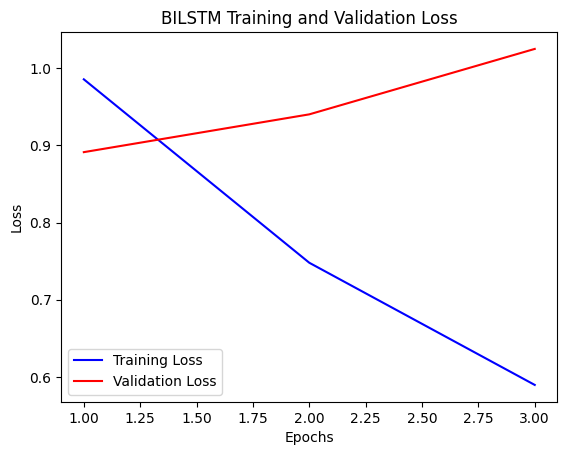

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the training and validation loss from the history object
train_loss = bilstm_history.history['loss']
val_loss = bilstm_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('BILSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Define the base classifiers
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]


In [ ]:
# Define the stacked classifier with Random Forest as the final estimator
stacked_classifier = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())


In [ ]:
# Train the stacked classifier
stacked_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Generate predictions
stacked_pred = stacked_classifier.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, stacked_pred)
print(f"Accuracy of the Stacked Classifier: {accuracy}")

Accuracy of the Stacked Classifier: 0.4870595823591067


In [ ]:
# Create a confusion matrix
conf_matrix_stacked = confusion_matrix(y_test, stacked_pred)

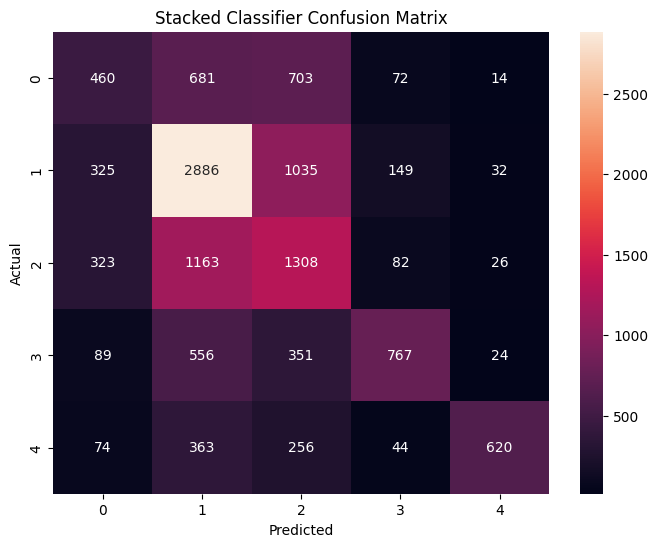

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacked, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacked Classifier Confusion Matrix')
plt.show()